In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 90.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 81.2 MB/s eta 0:00:00


In [ ]:
#pip install pycaret[full]

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.0.0'

In [ ]:
# Habilite o pandas
import pandas as pd

# Habilite o matplotlib 3.1.3
# Lembre que aqui é preciso concordar com a instalação desta versão (coloca y quando colab perguntar se você concorda com a instalação)
#!pip uninstall matplotlib
#!pip install matplotlib==3.1.3

# Habilite o seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

#!pip install yfinance
#import yfinance as yf

In [ ]:
### loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = pd.read_csv('/content/Dados VALE.csv')
data.head()



,Date,Close
0,01/05/2000,3.49
1,01/06/2000,3.75
2,01/07/2000,3.71
3,01/08/2000,3.85
4,01/09/2000,3.50


In [ ]:
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')
data.set_index('Date', drop = True, inplace = True)
data.head()

,Close
Date,
2000-05-01,3.49
2000-06-01,3.75
2000-07-01,3.71
2000-08-01,3.85
2000-09-01,3.50


<Axes: xlabel='Date'>

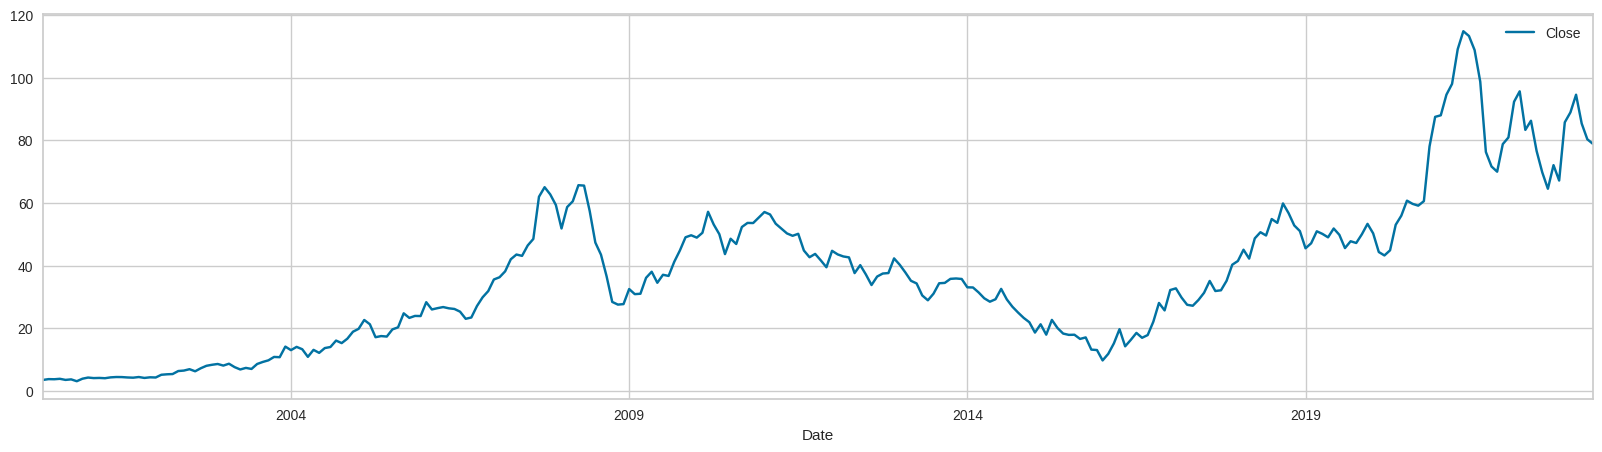

In [ ]:
# Plotar a série temporal (variável Value)
# O figsize determina apenas o tamanho do gráfico
data.plot(figsize=(20,5))

In [ ]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(data, fh = 12, fold =5)

,Description,Value
0,session_id,3449
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(276, 1)"
5,Transformed data shape,"(276, 1)"
6,Transformed train set shape,"(264, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,3.4325,2.9358,11.1871,13.4851,0.1670,0.1847,-1.5230,0.2620
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,3.4689,2.9470,11.2987,13.5369,0.1667,0.1908,-1.0530,0.2300
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,3.4806,2.9592,11.4224,13.7023,0.1677,0.1806,-1.0554,0.4760
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,3.5773,3.0574,11.7956,14.2707,0.1748,0.1825,-1.0984,0.5300
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,3.5859,3.0744,11.7197,14.1971,0.1716,0.1909,-0.9301,0.3220
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,3.6392,3.1177,11.9637,14.4692,0.1749,0.1876,-1.1803,0.2720
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,3.7545,3.2085,12.3605,14.9315,0.1795,0.1921,-1.1676,0.3920
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,3.9023,3.3082,12.8724,15.4255,0.1848,0.1978,-1.2025,0.3220
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,3.9036,3.3094,12.8779,15.4330,0.1849,0.1978,-1.2015,0.2180
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,3.9037,3.3095,12.8783,15.4336,0.1849,0.1978,-1.2014,0.2220


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [ ]:
# Podemos analisar os parâmetros de erro do melhor modelo selecionado
rf_cds_dt	= create_model('rf_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2017-04,2.3199,2.0588,7.1412,9.1101,0.1748,0.2003,-0.9631
1,2018-04,1.3467,1.1787,4.1950,5.2101,0.0778,0.0818,-0.8698
2,2019-04,1.1533,0.9925,3.6979,4.4339,0.0793,0.0762,-1.1670
3,2020-04,7.5791,6.6267,24.3372,29.5620,0.2883,0.3535,-1.5302
4,2021-04,5.0039,3.9391,17.7409,20.1957,0.2185,0.1913,-0.7470
Mean,NaT,3.4806,2.9592,11.4224,13.7023,0.1677,0.1806,-1.0554
SD,NaT,2.4672,2.1099,8.2091,9.7243,0.0813,0.1010,0.2742


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Podemos verificar o comportamento da previsão x o comportamento real da série
# Também é possível extraploar o limite das 6 observações de teste para quantas desejar (no caso optamos pelos próximos 50 meses)
plot_model(rf_cds_dt, plot = 'forecast', data_kwargs = {'fh' : 20})